<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-vallesda/blob/main/actividad_semanal7_visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Ciencia y analítica de datos**
### Tecnológico de Monterrey
### Dra. María de la Paz Rico Fernández
### Dr. Juan Miguel Meza Méndez

## **Repaso Visualizaciones**
### **David Valles A01191310**



In [81]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

1) Descarga base de datos

In [4]:
file_path = 'sample_data/default_of_credit_card_clients.csv'
credit_df = pd.read_csv(file_path)
credit_df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


2) Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [5]:
credit_df.shape

(30000, 25)

In [6]:
credit_df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [7]:
credit_df.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [10]:
credit_df.info

<bound method DataFrame.info of           ID      X1   X2   X3   X4    X5   X6   X7   X8   X9  ...      X15  \
0          1   20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0  ...      0.0   
1          2  120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  ...   3272.0   
2          3   90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  ...  14331.0   
3          4   50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  ...  28314.0   
4          5   50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  ...  20940.0   
...      ...     ...  ...  ...  ...   ...  ...  ...  ...  ...  ...      ...   
29995  29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  ...  88004.0   
29996  29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  ...   8979.0   
29997  29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  ...  20878.0   
29998  29999   80000  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  ...  52774.0   
29999  30000   50000  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  ...  36535.0   

           X16     

In [12]:
credit_df.isna()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


3) Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [7]:
# Valida nulos en DF.
credit_df.isnull().any()

ID     False
X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

In [8]:
# Remueve nulos
credit_df.dropna(inplace=True)

4) Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [5]:
credit_df.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,29999.000000,29998.000000,29998.000000,29995.000000,29997.000000,29995.000000,29993.000000,29991.000000,...,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000,29997.000000
mean,15000.500000,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,8660.398374,129747.661567,0.489125,0.790320,0.521968,9.218024,1.123829,1.197254,1.196048,1.169153,...,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359,0.415054
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


5) Realiza el conteo de las variables categóricas

In [181]:
X = credit_df.iloc[:,:-1]  
Y = credit_df.iloc[:,-1] 


In [131]:
#X2: Gender (1 = male; 2 = female). 
#X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
#X4: Marital status (1 = married; 2 = single; 3 = others). 
#X5: Age (year).
#X6-11:
# Transformaciones categóricas de entrada:
cat_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  
cat_pipeline_nombres = ['X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']

In [132]:
# Transformaciones numericas de entrada:
num_pipeline = Pipeline(steps = [('stdScaler', StandardScaler()),])   
num_pipeline_nombres = ['X12','X13','X14','X15','X16','X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']

In [133]:
# transformaciones numéricas y categóricas
ct = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('catimp', cat_pipeline, cat_pipeline_nombres)],
                                        remainder='passthrough')

In [150]:
# transformaciones numericas
ct2 = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres)],
                                        remainder='passthrough')

6) Escala los datos, si consideras necesario

In [188]:
cols = ['X12','X13','X14','X15','X16','X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'Y']
df = pd.DataFrame(credit_df.loc[:, cols].values, columns=cols)

In [189]:
# En esta Y y X solo usamos variables numericas como features
XN = df.iloc[:,:-1]  
YN = df.iloc[:,-1] 

In [146]:
# En el paso anterior se escalan y transforman los datos para normalizarlos en preparacion para el PCA.
X = ct.fit_transform(X)

In [190]:
XN = ct2.fit_transform(XN)

In [191]:
XN

array([[-0.64249667, -0.64735943, -0.66792529, ..., -0.30810735,
        -0.31412418, -0.29348473],
       [-0.65920548, -0.66669659, -0.63920112, ..., -0.24431534,
        -0.31412418, -0.18105373],
       [-0.29873773, -0.49394006, -0.48243607, ..., -0.24431534,
        -0.24870184, -0.01240721],
       ...,
       [-0.6472202 , -0.64379252, -0.63810577, ..., -0.0401809 ,
        -0.18327949, -0.11921667],
       [-0.71793741,  0.40975268,  0.42187794, ..., -0.18524394,
         3.15090487, -0.19207196],
       [-0.04505161, -0.00414961,  0.03936947, ..., -0.24431534,
        -0.24870184, -0.23726923]])

7) Reduce la dimensiones con PCA

In [203]:
pca = PCA(4)
principal_components = pca.fit_transform(XN)
principal_components.size

119832

In [209]:
pcomponents_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pcomponents_df


,PC1,PC2,PC3,PC4
0,-1.752131,-0.224582,0.077865,0.007174
1,-1.663320,-0.144151,0.054782,-0.002736
2,-1.135073,-0.176809,-0.015432,-0.129044
3,-0.397740,-0.451078,0.099849,-0.035074
4,-0.793810,0.863540,0.637891,0.219596
...,...,...,...,...
29953,2.539964,-0.703915,0.476645,-0.652577
29954,-1.571192,0.081622,0.291199,0.111018
29955,-1.135612,0.404014,0.179914,0.479630
29956,0.906830,2.786328,-0.584776,-0.861352


In [210]:
# Con 4 principal components cumplimos el requerimiento de >70 de la varianza. Esto significa que con 4 componentes tenemos el 75% de la varianza 
pca.explained_variance_ratio_

array([0.48140781, 0.13579648, 0.07576596, 0.0736049 ])

8) Elabora los histogramas de los atributos para visualizar su distribución

In [211]:
# Agrupamos los 4 componentes con el resultado esperado o variable dependiente para poder graficar y explorar los componentes
finalDf = pd.concat([pcomponents_df, YN], axis = 1)
finalDf

,PC1,PC2,PC3,PC4,Y
0,-1.752131,-0.224582,0.077865,0.007174,1.0
1,-1.663320,-0.144151,0.054782,-0.002736,1.0
2,-1.135073,-0.176809,-0.015432,-0.129044,0.0
3,-0.397740,-0.451078,0.099849,-0.035074,0.0
4,-0.793810,0.863540,0.637891,0.219596,0.0
...,...,...,...,...,...
29953,2.539964,-0.703915,0.476645,-0.652577,0.0
29954,-1.571192,0.081622,0.291199,0.111018,0.0
29955,-1.135612,0.404014,0.179914,0.479630,1.0
29956,0.906830,2.786328,-0.584776,-0.861352,1.0


In [227]:
finalDf.describe()

,PC1,PC2,PC3,PC4,Y
count,2.995800e+04,2.995800e+04,2.995800e+04,2.995800e+04,29958.000000
mean,7.589748e-18,-6.641030e-18,-7.589748e-18,4.980772e-18,0.221143
std,2.403557e+00,1.276563e+00,9.535312e-01,9.398342e-01,0.415023
min,-3.409977e+00,-4.713932e+00,-2.200402e+01,-2.159673e+01,0.000000
25%,-1.508454e+00,-4.279915e-01,-2.175308e-03,-6.762178e-02,0.000000
50%,-8.626896e-01,-2.089456e-01,7.048300e-02,1.822837e-02,0.000000
75%,4.960080e-01,8.634713e-02,1.358749e-01,8.173622e-02,0.000000
max,3.747103e+01,8.348588e+01,3.841257e+01,2.178427e+01,1.000000


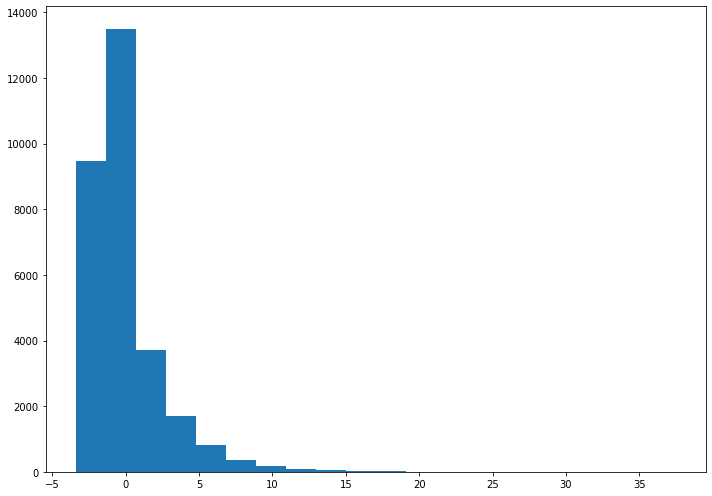

In [225]:
# Histograma para el PC1
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(pcomponents_df['PC1'], bins = 20)
plt.show()

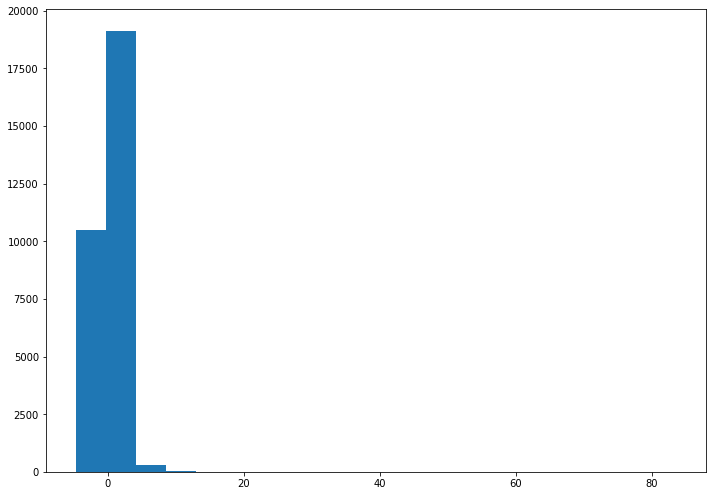

In [226]:
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
axs.hist(pcomponents_df['PC2'], bins = 20)
plt.show()

9) Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados.

In [ ]:
#Scatters plots para ver relacion entre componentes principales

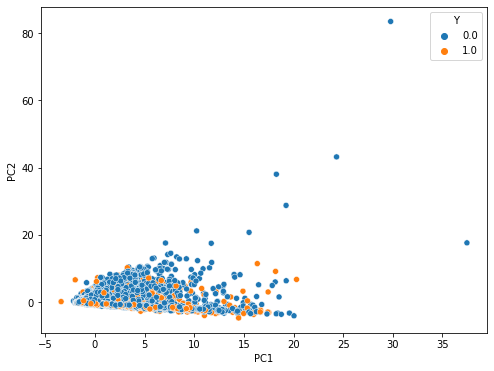

In [228]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=finalDf, x='PC1', y='PC2', hue='Y');

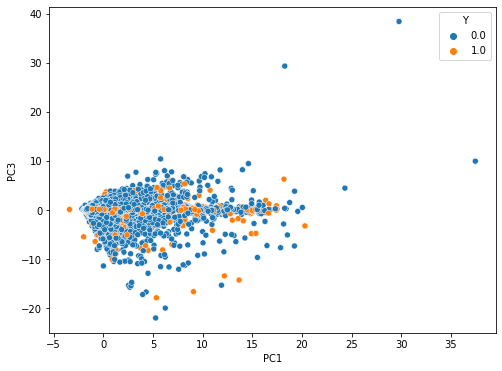

In [213]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=finalDf, x='PC1', y='PC3', hue='Y');

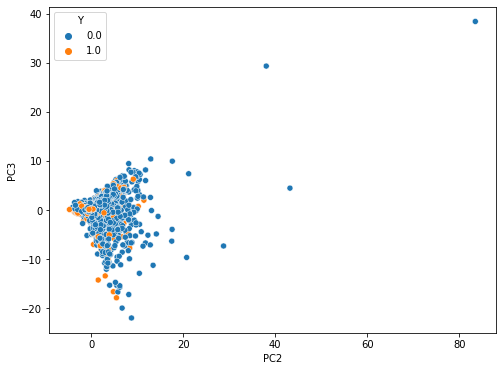

In [214]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=finalDf, x='PC2', y='PC3', hue='Y');

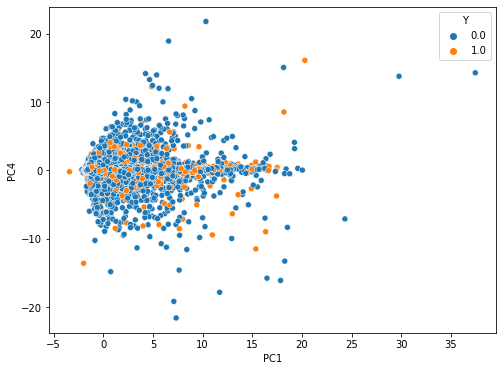

In [215]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=finalDf, x='PC1', y='PC4', hue='Y');

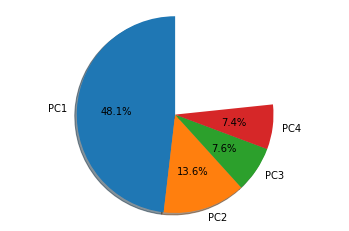

In [231]:
#Pie Chart
labels = ['PC1', 'PC2', 'PC3', 'PC4']
sizes = pca.explained_variance_ratio_

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

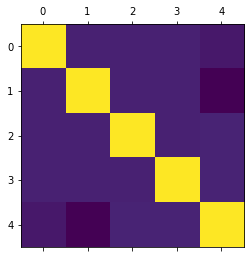

In [237]:
plt.matshow(finalDf.corr())
plt.show()

10) Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

Con PCA se logro una reducir de 14 features a 4 componentes principales. En donde con 4 componentes logramos tener el 76.7%


Con los graficos podemos observar que no existe relacion entre PC1 con PC3 y PC2. Esto se observa con un scatterplot, en donde aunque el valor de PC1 aumenta PC3 y PC2 permanecen en 0.


Por ultimo, con la matriz de correlacion tambien podemos obtener que existe una relacion entre PC1 y PC4.